<a href="https://colab.research.google.com/github/silsaptak/Profile_Cloning/blob/main/Fake_Profile_Detection_using_ML_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##Data Import
import pandas as pd

def read_datasets():
    """Reads user profiles from CSV files and combines them into one DataFrame with labels."""
    fake_users = pd.read_csv("/content/fusers.csv")     # Label as 1
    genuine_users = pd.read_csv("/content/users.csv")   # Label as 0

    fake_users['label'] = 1
    genuine_users['label'] = 0

    data = pd.concat([fake_users, genuine_users], ignore_index=True)
    return data


In [ ]:
data.isnull().sum()

,0
statuses_count,0
followers_count,0
friends_count,0
favourites_count,0
listed_count,0
time_zone,0
default_profile,0
geo_enabled,0
profile_use_background_image,0
profile_background_tile,0


##**Data Cleaning**
###1)Check missing values
###2)Handling duplicates
###3)Check data types
###4)Understand the dataset

In [ ]:
data=read_datasets()
data.head()

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at,url,...,profile_background_image_url,profile_background_color,profile_link_color,utc_offset,protected,verified,description,updated,dataset,label
0,370098498,pirfectmoses,pirfectmoses,24,4,588,16,0,Thu Sep 08 13:20:35 +0000 2011,NaN,...,http://a0.twimg.com/profile_background_images/...,C6E2EE,1F98C7,NaN,NaN,NaN,NaN,2015-02-14 10:40:01,INT,1
1,37384589,SAK Nair,bsknair1967,656,57,693,597,0,Sun May 03 07:35:13 +0000 2009,NaN,...,http://a0.twimg.com/images/themes/theme1/bg.png,C0DEED,0084B4,NaN,NaN,NaN,in Kuwait with my buetiful family.,2015-02-14 10:40:01,INT,1
2,72110028,Deepak,dedjven,1234,15,104,1150,0,Sun Sep 06 19:50:08 +0000 2009,NaN,...,http://a0.twimg.com/images/themes/theme14/bg.gif,131516,009999,-39600.0,NaN,NaN,NaN,2015-02-14 10:40:01,INT,1
3,82885728,Marcos Vinicius,BrowAlves,573,14,227,530,0,Fri Oct 16 14:02:48 +0000 2009,NaN,...,http://a0.twimg.com/profile_background_images/...,C0DEED,0084B4,NaN,NaN,NaN,NaN,2015-02-14 10:40:01,INT,1
4,110120789,Shri Kant Kanaujia,kanaujiask,675,18,519,653,0,Sun Jan 31 12:08:41 +0000 2010,NaN,...,http://a0.twimg.com/images/themes/theme1/bg.png,C0DEED,0084B4,19800.0,NaN,NaN,NaN,2015-02-14 10:40:01,INT,1


In [ ]:
###Removing unwanted features
data.drop('name', axis=1,inplace=True)
data.drop('screen_name', axis=1,inplace=True)
data.drop('id', axis=1,inplace=True)
data.drop('url', axis=1,inplace=True)
data.drop('location', axis=1,inplace=True)
data.drop('default_profile_image', axis=1,inplace=True)
data["default_profile"] = data["default_profile"].fillna(0).astype(int)
data["profile_background_tile"] = data["profile_background_tile"].fillna(0).astype(int)
data["geo_enabled"] = data["geo_enabled"].fillna(0).astype(int)
data.drop('profile_image_url', axis=1,inplace=True)
data.drop('profile_banner_url', axis=1,inplace=True)
data.drop('profile_background_image_url_https', axis=1,inplace=True)
data["profile_use_background_image"] = data["profile_use_background_image"].fillna(0).astype(int)
data.drop('profile_text_color', axis=1,inplace=True)
data.drop('profile_image_url_https', axis=1,inplace=True)
#data.drop('profile_background_image_url_https', axis=1,inplace=True)
#Protected and Verified all Nan values
data.drop('protected', axis=1,inplace=True)
data.drop('verified', axis=1,inplace=True)
##Description to boolean
data["description"] = data["description"].apply(lambda x: 1 if pd.notnull(x) and str(x).strip() != "" else 0)
##Time Zone to boolean -- majority are fake
data["time_zone"] = data["time_zone"].apply(lambda x: 1 if pd.notnull(x) and str(x).strip() != "" else 0)
data.drop('dataset', axis=1,inplace=True)
data.drop('utc_offset', axis=1,inplace=True)
data.drop('profile_link_color', axis=1,inplace=True)
data.drop('profile_background_color', axis=1,inplace=True)
data.drop('profile_background_image_url', axis=1,inplace=True)
data.drop('profile_sidebar_border_color', axis=1,inplace=True)
data.drop('profile_sidebar_fill_color',axis=1,inplace=True)
data.drop('lang',axis=1,inplace=True)



In [ ]:
data.head()

,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at,time_zone,default_profile,geo_enabled,profile_use_background_image,profile_background_tile,description,updated,label
0,24,4,588,16,0,Thu Sep 08 13:20:35 +0000 2011,0,0,0,1,0,0,2015-02-14 10:40:01,1
1,656,57,693,597,0,Sun May 03 07:35:13 +0000 2009,0,1,0,1,0,1,2015-02-14 10:40:01,1
2,1234,15,104,1150,0,Sun Sep 06 19:50:08 +0000 2009,1,0,1,1,1,0,2015-02-14 10:40:01,1
3,573,14,227,530,0,Fri Oct 16 14:02:48 +0000 2009,0,0,0,1,0,0,2015-02-14 10:40:01,1
4,675,18,519,653,0,Sun Jan 31 12:08:41 +0000 2010,1,1,0,1,0,0,2015-02-14 10:40:01,1


In [ ]:
data.isnull().sum()

,0
statuses_count,0
followers_count,0
friends_count,0
favourites_count,0
listed_count,0
created_at,0
time_zone,0
default_profile,0
geo_enabled,0
profile_use_background_image,0


###Convert time to days

In [ ]:
data["created_at"] = pd.to_datetime(data["created_at"]).dt.tz_localize(None)
data["updated"] = pd.to_datetime(data["updated"]).dt.tz_localize(None)

<ipython-input-6-decf49f31d90>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["created_at"] = pd.to_datetime(data["created_at"]).dt.tz_localize(None)


In [ ]:
current_time = pd.Timestamp.now().tz_localize(None)

# Calculate features
data["account_age_days"] = (current_time - data["created_at"]).dt.days
data["days_since_update"] = (current_time - data["updated"]).dt.days

In [ ]:
data.drop('created_at', axis=1,inplace=True)
data.drop('updated',axis=1,inplace=True)

In [ ]:
data.head()

,statuses_count,followers_count,friends_count,favourites_count,listed_count,time_zone,default_profile,geo_enabled,profile_use_background_image,profile_background_tile,description,label,account_age_days,days_since_update
0,24,4,588,16,0,0,0,0,1,0,0,1,4986,3731
1,656,57,693,597,0,0,1,0,1,0,1,1,5844,3731
2,1234,15,104,1150,0,1,0,1,1,1,0,1,5717,3731
3,573,14,227,530,0,0,0,0,1,0,0,1,5678,3731
4,675,18,519,653,0,1,1,0,1,0,0,1,5571,3731


In [ ]:
num_features=[features for features in data.columns if data[features].dtype!='O']
print('Number of Numerical features : ',len(num_features))

Number of Numerical features :  14


In [ ]:
cat_features=[features for features in data.columns if data[features].dtype=='O']
print('Number of Categorical features : ',len(cat_features))

Number of Categorical features :  0


###Duplicate column drop

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
#Discrete features -- Pin Code not motre then 25
dis_features=[features for features in num_features if len(data[features].unique())<=25]
print('Number of discrete features : ',len(dis_features))
for i in dis_features:
  print(i,':',len(data[i].unique()),'labels')

Number of discrete features :  8
time_zone : 2 labels
default_profile : 2 labels
geo_enabled : 2 labels
profile_use_background_image : 2 labels
profile_background_tile : 2 labels
description : 2 labels
label : 2 labels
days_since_update : 1 labels


In [ ]:
#Applying Normalization
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assume `df` is your DataFrame
features_to_normalize = [
    'statuses_count',
    'followers_count',
    'friends_count',
    'favourites_count',
    'listed_count',
    'account_age_days',
    'days_since_update'
]

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the selected features
data[features_to_normalize] = scaler.fit_transform(data[features_to_normalize])

print(data[features_to_normalize].describe())

       statuses_count  followers_count  friends_count  favourites_count  \
count     2813.000000      2813.000000    2813.000000       2813.000000   
mean         0.020972         0.000910       0.030998          0.005298   
std          0.061201         0.019663       0.036475          0.032630   
min          0.000000         0.000000       0.000000          0.000000   
25%          0.000438         0.000042       0.013231          0.000000   
50%          0.000977         0.000064       0.023957          0.000000   
75%          0.013709         0.000272       0.040633          0.000834   
max          1.000000         1.000000       1.000000          1.000000   

       listed_count  account_age_days  days_since_update  
count   2813.000000       2813.000000             2813.0  
mean       0.003795          0.232761                0.0  
std        0.031587          0.180291                0.0  
min        0.000000          0.000000                0.0  
25%        0.000000          

In [ ]:
#All the values are same for the days_since_updated
data.drop('days_since_update',axis=1,inplace=True)

In [ ]:
data.head()

,statuses_count,followers_count,friends_count,favourites_count,listed_count,time_zone,default_profile,geo_enabled,profile_use_background_image,profile_background_tile,description,label,account_age_days
0,0.000300,0.000010,0.046035,0.000361,0.0,0,0,0,1,0,0,1,0.270758
1,0.008213,0.000140,0.054255,0.013461,0.0,0,1,0,1,0,1,1,0.657942
2,0.015449,0.000037,0.008142,0.025931,0.0,1,0,1,1,1,0,1,0.600632
3,0.007174,0.000034,0.017772,0.011951,0.0,0,0,0,1,0,0,1,0.583032
4,0.008451,0.000044,0.040633,0.014724,0.0,1,1,0,1,0,0,1,0.534747


##Train test Split

In [ ]:
from sklearn.model_selection import train_test_split
X=data.drop(['label'],axis=1)
Y=data['label']
Y.value_counts()

,count
label,
0,1481
1,1332


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=42)
X_train.shape,X_test.shape

((1969, 12), (844, 12))

In [ ]:
#Number of features
num_features=[features for features in X.columns]
print('Number of Numerical features : ',len(num_features))

Number of Numerical features :  12


##ANN Implementation

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model=Sequential([
    Dense(128,activation='relu',input_shape=(X_train.shape[1],)),  #HL1
    Dense(64,activation='relu'),  #HL2
    Dense(32,activation='relu'),  #HL3
    Dense(16,activation='relu'),  #HL4
    Dense(1,activation='sigmoid') #o/p
]
)

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,545 (49.00 KB)

 Trainable params: 12,545 (49.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1)
# Predict probabilities
y_pred_prob = model.predict(X_test)

Epoch 1/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8487 - loss: 0.5073 - val_accuracy: 0.9340 - val_loss: 0.1946
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9430 - loss: 0.1848 - val_accuracy: 0.9340 - val_loss: 0.1867
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9369 - loss: 0.1879 - val_accuracy: 0.9391 - val_loss: 0.1780
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9462 - loss: 0.1651 - val_accuracy: 0.9492 - val_loss: 0.1882
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9439 - loss: 0.1761 - val_accuracy: 0.9492 - val_loss: 0.1764
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9465 - loss: 0.1786 - val_accuracy: 0.9442 - val_loss: 0.1675
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9403 - loss: 0.1716 - val_accuracy: 0.9492 - val_loss: 0.1631
Epoch 8/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9499 - loss: 0.1531 - val_accuracy: 0.9492 - 

In [ ]:
# Convert probabilities to class labels
y_pred = (y_pred_prob > 0.5).astype("int32").flatten()

Accuracy: 0.9905100830367735

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       450
           1       0.98      1.00      0.99       393

    accuracy                           0.99       843
   macro avg       0.99      0.99      0.99       843
weighted avg       0.99      0.99      0.99       843



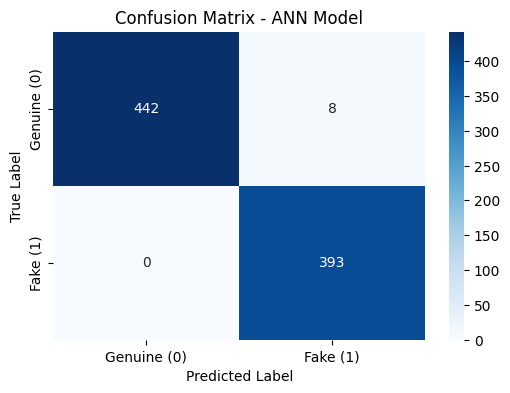

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Genuine (0)', 'Fake (1)']

# Plot using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - ANN Model')
plt.show()

##4-cross val ANN

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Make sure your features (X_data) and labels (y_data) are NumPy arrays
X = X.to_numpy() if hasattr(X, 'to_numpy') else X
y = Y.to_numpy() if hasattr(Y, 'to_numpy') else Y

###4 fold

In [ ]:
kf = KFold(n_splits=4, shuffle=True, random_state=42)
fold = 1
accuracies = []


Fold 1:
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8234 - loss: 0.4861
Epoch 2/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9500 - loss: 0.1645
Epoch 3/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9537 - loss: 0.1510
Epoch 4/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9463 - loss: 0.1679
Epoch 5/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9536 - loss: 0.1496
Epoch 6/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9534 - loss: 0.1464
Epoch 7/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9573 - loss: 0.1313
Epoch 8/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9461 - loss: 0.1566
Epoch 9/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9634 - loss: 0.1157
Epoch 10/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9624 - loss: 0.1165
Epoch 11/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9618 - loss: 0.1083
Epoch 12/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9630 - lo

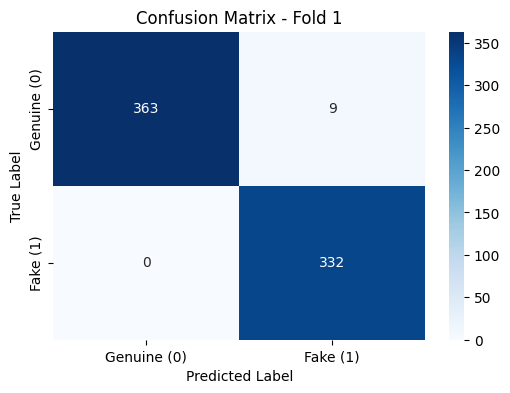


Fold 2:
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7765 - loss: 0.5523
Epoch 2/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9562 - loss: 0.1479
Epoch 3/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9575 - loss: 0.1494
Epoch 4/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9560 - loss: 0.1408
Epoch 5/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9482 - loss: 0.1558
Epoch 6/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9629 - loss: 0.1331
Epoch 7/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9520 - loss: 0.1532
Epoch 8/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9596 - loss: 0.1242
Epoch 9/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9668 - loss: 0.1060
Epoch 10/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9685 - loss: 0.1133
Epoch 11/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9718 - loss: 0.0898
Epoch 12/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9672 - lo

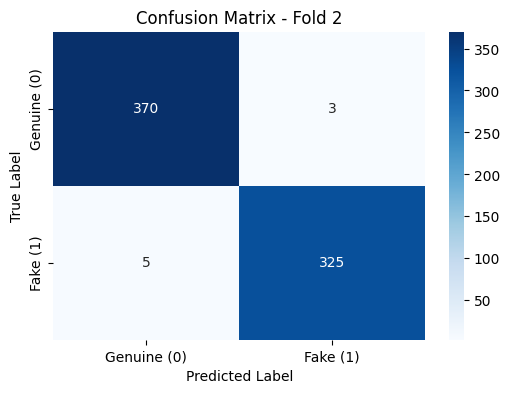


Fold 3:
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7452 - loss: 0.5970
Epoch 2/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9502 - loss: 0.1713
Epoch 3/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9533 - loss: 0.1498
Epoch 4/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9516 - loss: 0.1598
Epoch 5/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9508 - loss: 0.1671
Epoch 6/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9484 - loss: 0.1724
Epoch 7/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9510 - loss: 0.1528
Epoch 8/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9558 - loss: 0.1378
Epoch 9/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9581 - loss: 0.1355
Epoch 10/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9595 - loss: 0.1419
Epoch 11/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9612 - loss: 0.1410
Epoch 12/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9657 - lo

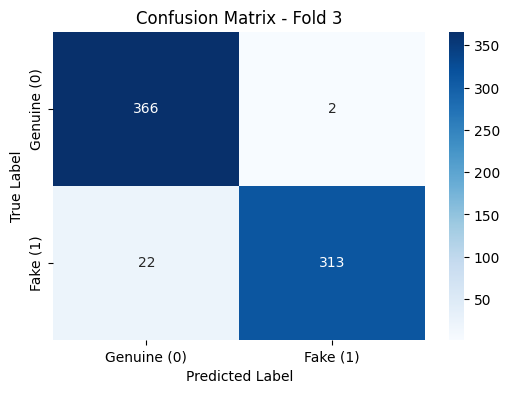


Fold 4:
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8672 - loss: 0.5230
Epoch 2/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9476 - loss: 0.1711
Epoch 3/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9477 - loss: 0.1734
Epoch 4/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9527 - loss: 0.1479
Epoch 5/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9531 - loss: 0.1599
Epoch 6/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9578 - loss: 0.1541
Epoch 7/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9560 - loss: 0.1415
Epoch 8/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9567 - loss: 0.1375
Epoch 9/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9629 - loss: 0.1196
Epoch 10/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9667 - loss: 0.1156
Epoch 11/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9603 - loss: 0.1182
Epoch 12/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9669 - lo

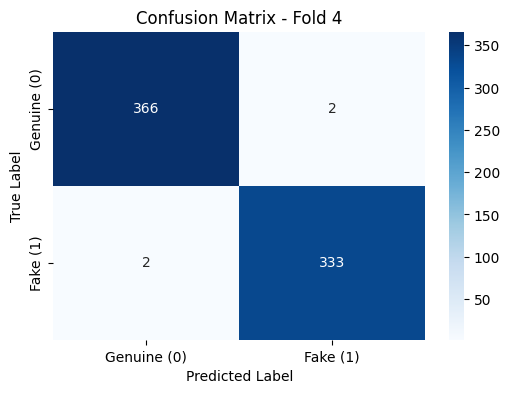

In [ ]:
for train_index, test_index in kf.split(X):
    print(f"\nFold {fold}:")

    # Split the data into training and testing sets for this fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=100, batch_size=32)
    y_pred_prob = model.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype("int32").flatten()

    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print("Accuracy:", acc)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    labels = ['Genuine (0)', 'Fake (1)']

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - Fold {fold}')
    plt.show()

    fold += 1


In [ ]:
print("\nAverage Accuracy over 4 folds:", np.mean(accuracies))


Average Accuracy over 4 folds: 0.9840017013125566
